<a href="https://colab.research.google.com/github/bnavaneetha22/Automatic-Number-Plate-Recognition--easyocr/blob/main/LPD_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip3 install opencv-python
!pip3 install pytesseract
!pip install easyocr 
import easyocr
! apt install tesseract-ocr
! apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
import numpy as np
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
import imutils
import glob
import tensorflow as tf
import matplotlib.pylab as plt
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
def ratioCheck(area, width, height):
    ratio = float(width) / float(height)
    if ratio < 1:
        ratio = 1 / ratio
    if (area < 1063.62 or area > 73862.5) or (ratio < 3 or ratio > 6):
        return False
    return True

In [ ]:
def isMaxWhite(plate):
    avg = np.mean(plate)
    if(avg>=115):
        return True
    else:
         return False

In [ ]:
def ratio_and_rotation(rect):
    (x, y), (width, height),rect_angle = rect
    if(width>height):
        angle = -rect_angle
    else:
        angle = 90 + rect_angle
    if angle>15:
         return False
    if height == 0 or width == 0:
        return False
    area = height*width
    if not ratioCheck(area,width,height):
        return False
    else:
        return True

In [ ]:
def clean2_plate(plate):
    gray_img = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray_img, 110, 255, cv2.THRESH_BINARY)
    if cv2.waitKey(0) & 0xff == ord('q'):
        pass
    num_contours,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    if num_contours:
        contour_area = [cv2.contourArea(c) for c in num_contours]
        max_cntr_index = np.argmax(contour_area)
        max_cnt = num_contours[max_cntr_index]
        max_cntArea = contour_area[max_cntr_index]
        x,y,w,h = cv2.boundingRect(max_cnt)
        if not ratioCheck(max_cntArea,w,h):
            return plate,None
        final_img = thresh[y:y+h, x:x+w]
        return final_img,[x,y,w,h]
    else:
        return plate, None

Number  input image...


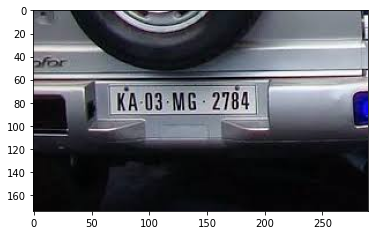

Number after masking the whole and visibling the number plate only...


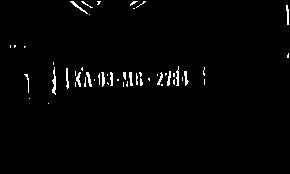

Number  identified number plate...


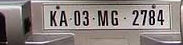

Number  Detected Plate Text :  LA 03 MG . 2784
Number  input image...


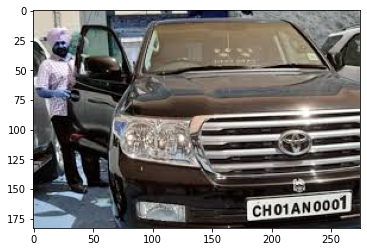

Number after masking the whole and visibling the number plate only...


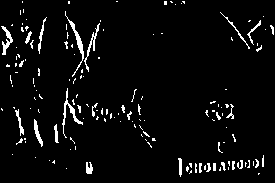

Number  identified number plate...


Number  Detected Plate Text :  CHOIAlODQJ
Number  input image...


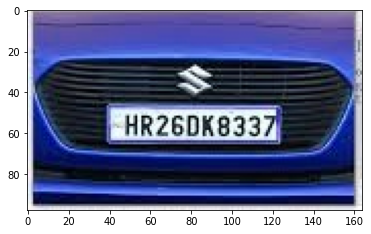

Number after masking the whole and visibling the number plate only...


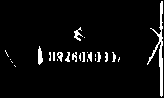

Number  identified number plate...


Number  Detected Plate Text :  HR26 DK8327
Number  input image...


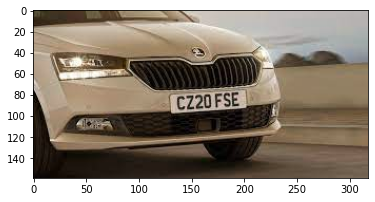

Number after masking the whole and visibling the number plate only...


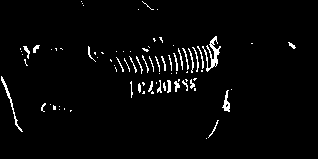

Number  identified number plate...


Number  Detected Plate Text :  {CZ2@FSE
Number  identified number plate...


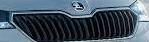

Number  input image...


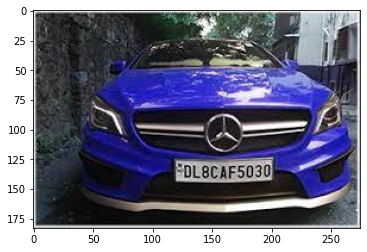

Number after masking the whole and visibling the number plate only...


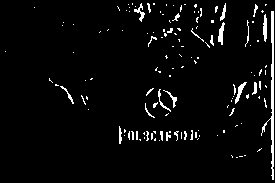

Number  identified number plate...


Number  Detected Plate Text :  'OLBCAF503O
Number  input image...


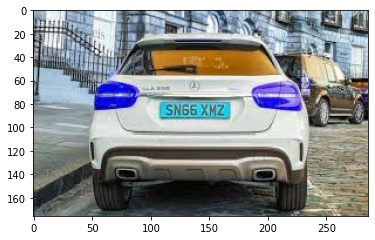

Number after masking the whole and visibling the number plate only...


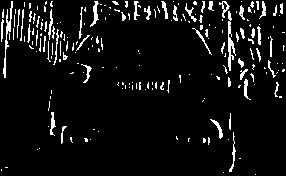

Number  identified number plate...


Number  Detected Plate Text :  XMZ
Number  input image...


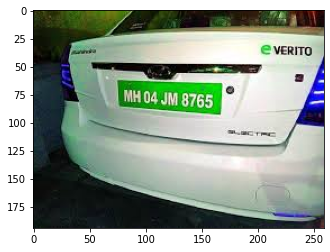

Number after masking the whole and visibling the number plate only...


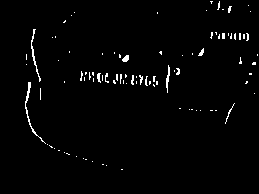

Number  identified number plate...


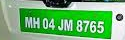

Number  Detected Plate Text :  0455
Number  input image...


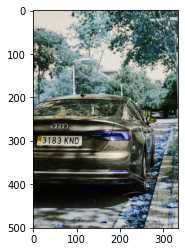

Number after masking the whole and visibling the number plate only...


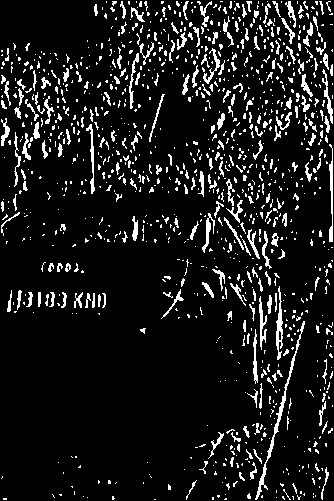

Number  identified number plate...


Number  Detected Plate Text :  43183 KND
Number  identified number plate...


Number  input image...


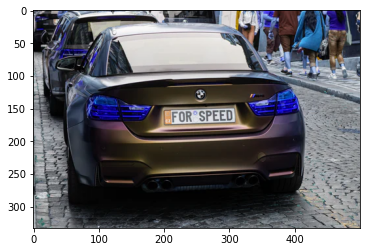

Number after masking the whole and visibling the number plate only...


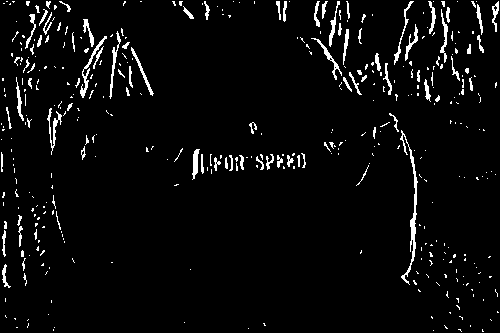

Number  identified number plate...


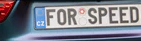

Number  Detected Plate Text :  For SPEED
Number  identified number plate...


Number  input image...


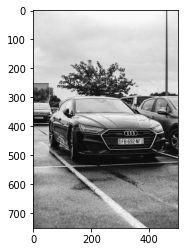

Number after masking the whole and visibling the number plate only...


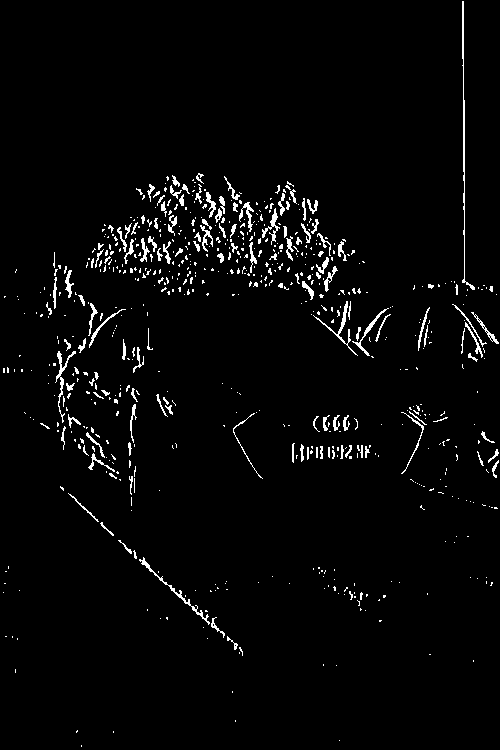

Number  identified number plate...


Number  identified number plate...


Number  Detected Plate Text :  1F&-692:HF &
Number  input image...


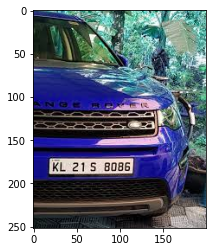

Number after masking the whole and visibling the number plate only...


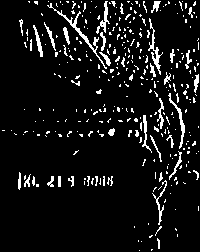

Number  identified number plate...


Number  Detected Plate Text :  KL 21 5
Number  input image...


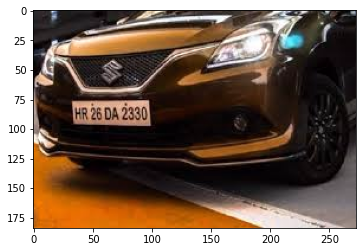

Number after masking the whole and visibling the number plate only...


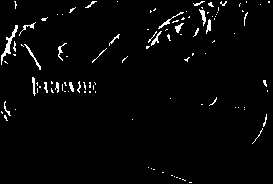

Number  identified number plate...


Number  Detected Plate Text :  HaaDA T330
Number  input image...


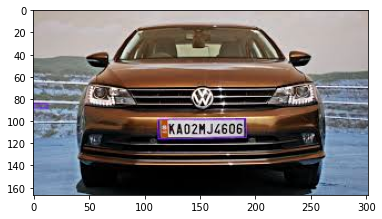

Number after masking the whole and visibling the number plate only...


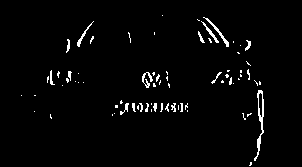

Number  identified number plate...


Number  Detected Plate Text :  XKadzhJ46o6
Number  input image...


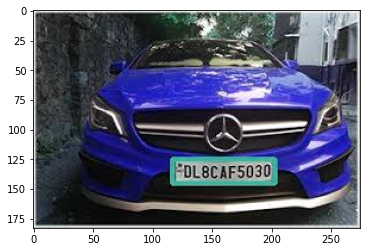

Number after masking the whole and visibling the number plate only...


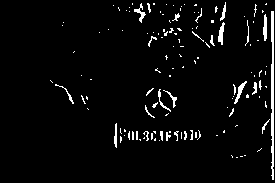

Number  identified number plate...


Number  Detected Plate Text :  FOL8CAFSOJO
Number  input image...


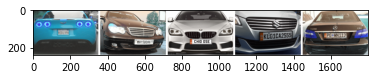

Number after masking the whole and visibling the number plate only...


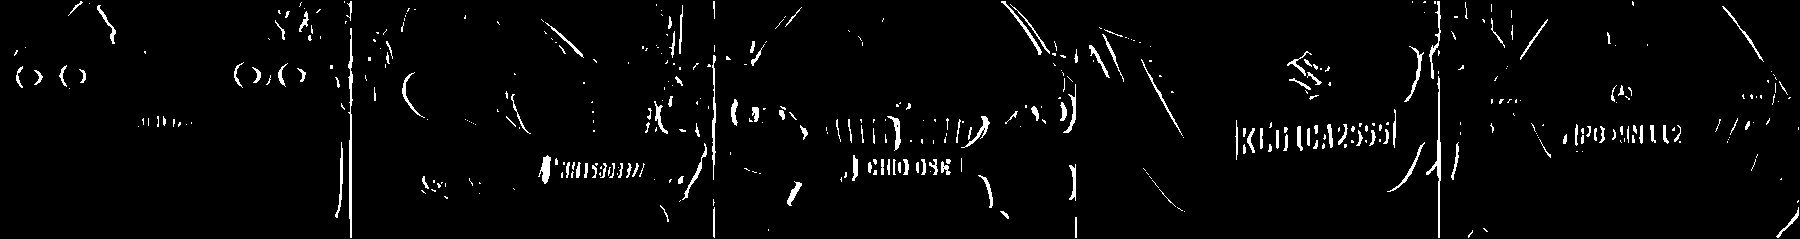

Number  identified number plate...


Number  Detected Plate Text :  Mxnba:
Number  identified number plate...


Number  Detected Plate Text :  chio OSE
Number  identified number plate...


Number  Detected Plate Text :  PG MNI12
Number  identified number plate...


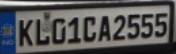

Number  identified number plate...


Number  input image...


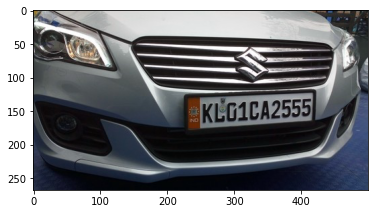

Number after masking the whole and visibling the number plate only...


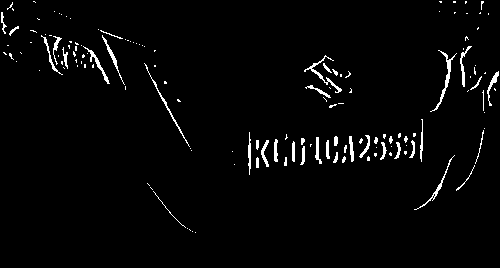

Number  identified number plate...


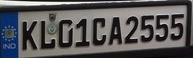

Number  identified number plate...


Number  input image...


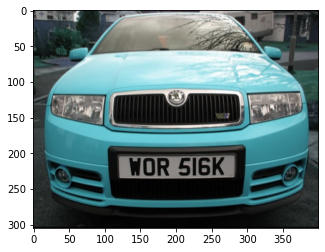

Number after masking the whole and visibling the number plate only...


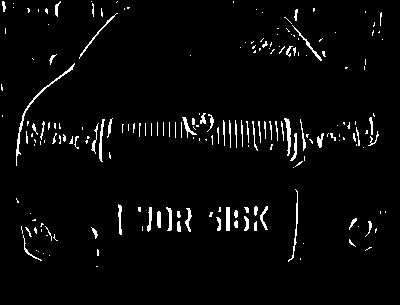

Number  identified number plate...


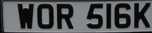

In [ ]:
#img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/car_15.jpg")
path=glob.glob("/content/drive/MyDrive/Colab Notebooks/data/*.jpg")
for file in path:
  img=cv2.imread(file)
  print("Number  input image...",)
  plt.imshow(img)
  plt.show()
  if cv2.waitKey(0) & 0xff == ord('q'):
    pass
  img2 = cv2.GaussianBlur(img, (3,3), 0)
  img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  img2 = cv2.Sobel(img2,cv2.CV_8U,1,0,ksize=3)    
  _,img2 = cv2.threshold(img2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  element = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(17, 3))
  morph_img_threshold = img2.copy()
  cv2.morphologyEx(src=img2, op=cv2.MORPH_CLOSE, kernel=element, dst=morph_img_threshold)
  num_contours, hierarchy= cv2.findContours(morph_img_threshold,mode=cv2.RETR_EXTERNAL,method=cv2.CHAIN_APPROX_NONE)
  cv2.drawContours(img2, num_contours, -1, (0,255,0), 1)
  print("Number after masking the whole and visibling the number plate only...")
  cv2_imshow(img2)
  for i,cnt in enumerate(num_contours):
    min_rect = cv2.minAreaRect(cnt)
    if ratio_and_rotation(min_rect):
       x,y,w,h = cv2.boundingRect(cnt)
       plate_img = img[y:y+h,x:x+w]
       print("Number  identified number plate...")
       cv2_imshow(plate_img)
       if cv2.waitKey(0) & 0xff == ord('q'):
         pass
       if(isMaxWhite(plate_img)):
         clean_plate, rect = clean2_plate(plate_img)
         if rect:
           fg=0
           x1,y1,w1,h1 = rect
           x,y,w,h = x+x1,y+y1,w1,h1
           # cv2.imwrite("clena.png",clean_plate)
           plate_im =clean_plate 
           reader=easyocr.Reader(['en'])
           result=reader.readtext(plate_im)
           print("Number  Detected Plate Text : ",result[0][1])
           with open('/content/drive/MyDrive/Colab Notebooks/abc.txt', 'a') as writefile:
             writefile.write(result[0][1])
             writefile.write("\n")
 